In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/kaggle/input/salary-pred/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

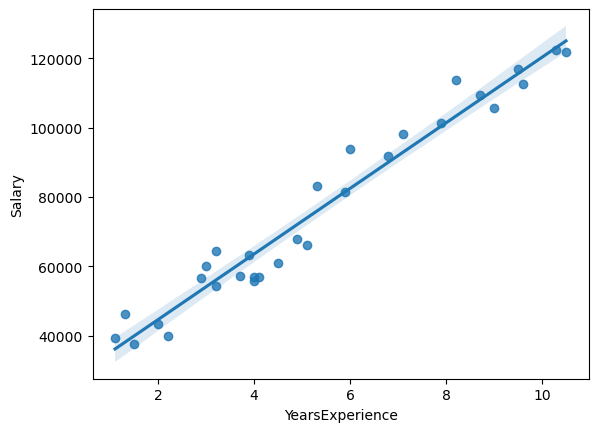

In [7]:
sns.regplot(x='YearsExperience',y='Salary',data=df,scatter=True)

# Modelling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
lr=LinearRegression()
l=Lasso()
e=ElasticNet()
r=Ridge()

In [17]:
x=np.array(df['YearsExperience'])
#reshape 1d array to 2d so as to fit in linearreg model.
x=x.reshape(len(df['YearsExperience']),1)
y=df['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)


In [20]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2_score(pred,y_test)

0.8961838737587328

In [21]:
l.fit(x_train,y_train)
pred1=l.predict(x_test)
r2_score(pred1,y_test)

0.8961805159269066

In [22]:
e.fit(x_train,y_train)
pred2=e.predict(x_test)
r2_score(pred2,y_test)

0.8758904275067263

In [23]:
r.fit(x_train,y_train)
pred3=r.predict(x_test)
r2_score(pred3,y_test)

0.8948344450862876

# input and test the model

In [27]:
a=float(input("Years of Experience"))
features=np.array([[a]])# "[]"is used twice to create a numpy array,the[a]creats a list.
print("predicted Salary:",lr.predict(features))

Years of Experience 2


predicted Salary: [44169.21365784]
